# Describing and analyzing time series

In what follows the library **pandas-datareader** is needed. It is not included in the standard package of Anaconda installation.

You can install a new library in the following way.
- Open Anaconda Navigator and choose **Environments**.
- If **pandas-datareader** is not found in the list of **Installed**, select the list **Not installed**.
- If **pandas-datareader** is not in this list either, update the list (**Update index**).
- Choose **pandas-datareader** and in the bottom of the window select **Apply**. 

Now we fetch data using pandas-datareader and describe and analyze time series.

In [1]:
### Bring the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### THo following library is needed to polish the time axis in our examples
import matplotlib.dates as mdates

### The following library is needed to fetch data from the Yahoo Finance service
### Make sure the library is installed as it is not included in the standard installation.

import pandas_datareader.data as web

### Style affects on layout of graphics
### Available styles can be listed as plt.style.available

plt.style.use('seaborn-whitegrid')

### Downloading data

We can download Elisa and Telia historical stock prices from the Yahoo Finance service. Stock prices listed in the service can be found using internet searches. For instance, typing "yahoo finance kemira" Kemira Oyj stock prices and its name on the service is found.

In [2]:
### Open the data in the dataframes named correspondingly.

elisa = web.DataReader('ELISA.HE', start = '2015-1-1', data_source = 'yahoo')
telia = web.DataReader('TELIA1.HE', start = '2015-1-1', data_source ='yahoo')

In [3]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,16.803358
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,16.595909
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,16.981173
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,16.914490
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,16.936718
...,...,...,...,...,...,...
2021-10-05,54.500000,53.680000,54.279999,54.180000,260599.0,54.180000
2021-10-06,54.160000,53.619999,54.119999,53.959999,237967.0,53.959999
2021-10-07,54.299999,53.799999,54.180000,53.939999,293925.0,53.939999


In [4]:
telia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,5.3600,5.2850,5.340,5.3050,1039894.0,0.050916
2015-01-05,5.3000,5.2050,5.290,5.2050,929121.0,0.049956
2015-01-07,5.3000,5.2200,5.240,5.2450,860595.0,0.050340
2015-01-08,5.4100,5.2600,5.260,5.4050,1001285.0,0.051876
2015-01-09,5.4200,5.2900,5.400,5.2950,917754.0,0.050820
...,...,...,...,...,...,...
2021-10-05,3.5795,3.5510,3.565,3.5760,451896.0,3.576000
2021-10-06,3.5705,3.5205,3.570,3.5290,746941.0,3.529000
2021-10-07,3.5680,3.5360,3.536,3.5535,587227.0,3.553500


### Line charts

Next draw some line charts using the data just fetched. Notice that you always have the most recent data available and therefore also charts.

Text(0, 1, 'Euros')

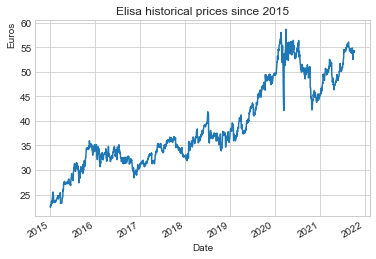

In [5]:
### Plot Elisa's historical prices, use daily closing prices.

elisa['Close'].plot()

### Add title and axis-titles

plt.title('Elisa historical prices since 2015')
plt.ylabel('Euros', loc='top')

Text(0, 1, 'Euros')

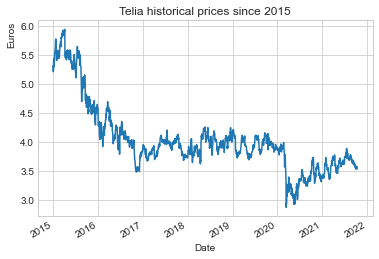

In [6]:
### Same for Telia's historical closing prices.

telia['Close'].plot()

### Add title and axis-titles

plt.title('Telia historical prices since 2015')
plt.ylabel('Euros', loc='top')

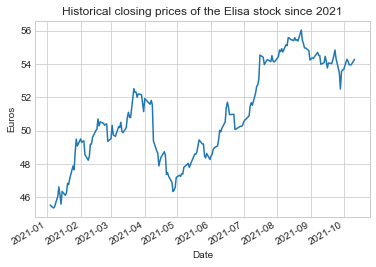

In [7]:
### Plot from the beginning of 2021

elisa['Close']['2021':].plot()

### Add title and axis-titles

plt.title('Historical closing prices of the Elisa stock since 2021')
plt.ylabel('Euros')

### Finally polish the format in the x-axis

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())


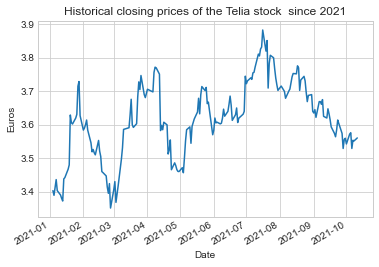

In [8]:
### Do the same for the Telia stock

### Plot from the beginning of 2021

telia['Close']['2021':].plot()

### Add title and axis-titles

plt.title('Historical closing prices of the Telia stock  since 2021')
plt.ylabel('Euros')

### Finally polish the format in the x-axis

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

### Aggregation

We can use **resample()** in order to aggregate a time series from one level to another, e.g. from daily series to monthly series.

Parameters for the function resample() that can be used can be found at:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In the following there are examples of aggregation. NOtice that in all of them the previous data with historical daily stock prices is used.

Text(0, 0.5, 'Euros')

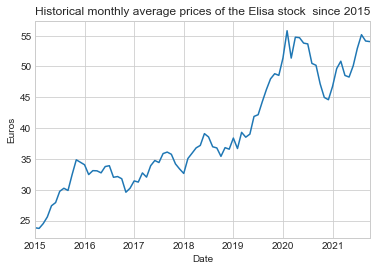

In [9]:
### Calculate monthly average prices using the previous daily data.

elisa['Close'].resample('M').mean().plot()

### Add title and axis-titles

plt.title('Historical monthly average prices of the Elisa stock  since 2015')
plt.ylabel('Euros')

Text(0, 0.5, 'Euros')

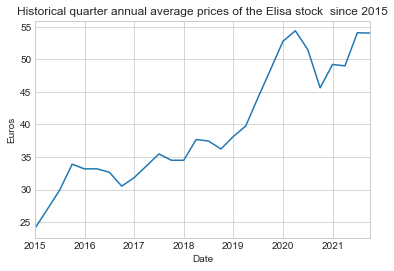

In [10]:
### Quarter annual average prices

elisa['Close'].resample('Q').mean().plot()

### Add title and axis-titles

plt.title('Historical quarter annual average prices of the Elisa stock  since 2015')
plt.ylabel('Euros')

Text(0, 0.5, 'Euros')

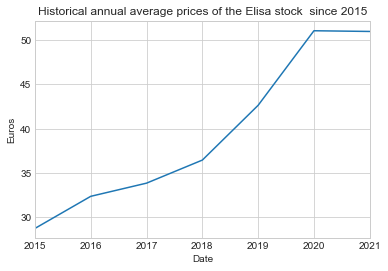

In [11]:
### Annual mean prices

elisa['Close'].resample('Y').mean().plot()

plt.title('Historical annual average prices of the Elisa stock  since 2015')
plt.ylabel('Euros')

Text(0, 0.5, 'Euros')

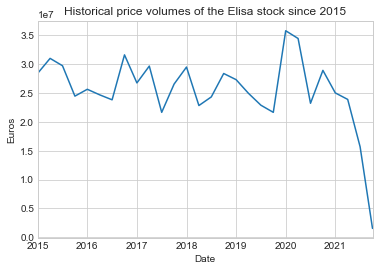

In [12]:
### The number of volume quarter annually

elisa['Volume'].resample('Q').sum().plot()

plt.title('Historical price volumes of the Elisa stock since 2015')
plt.ylabel('Euros')

### Moving averages

Moving averages are used to smooth down isolated price spikes.

In stock markets' technical analysis intersection points of time series and their moving averages have special interests. 

<AxesSubplot:xlabel='Date'>

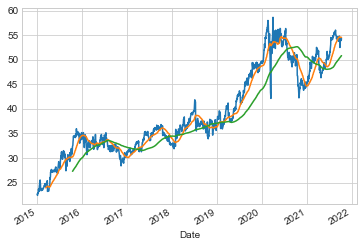

In [13]:
### Consider Elisa's stock markets and daily closing values

elisa['Close'].plot()

### Add 50 and 200 days moving averages to the line chart

elisa['Close'].rolling(50).mean().plot()
elisa['Close'].rolling(200).mean().plot()


### Add legends

### plt.legend([1, 2, 3], ['Elisa stock price', 'Elisa 50 days moving average', 'Elisa 200 days moving average'])

### plt.show()

## Percentages of changes

It's convinient to calculate percentages of changes using the function **pct_change()**.

In [14]:
### Changes of stock prices from the previous day as percentages

elisa['Elisa-daily%'] = elisa['Close'].pct_change()
telia['Telia-daily%'] = telia['Close'].pct_change()

In [15]:
### Dataframes elisa and telia now have a new column
elisa

,High,Low,Open,Close,Volume,Adj Close,Elisa-daily%
Date,,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,16.803358,NaN
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,16.595909,-0.012346
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,16.981173,0.023214
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,16.914490,-0.003927
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,16.936718,0.001314
...,...,...,...,...,...,...,...
2021-10-05,54.500000,53.680000,54.279999,54.180000,260599.0,54.180000,-0.001842
2021-10-06,54.160000,53.619999,54.119999,53.959999,237967.0,53.959999,-0.004061
2021-10-07,54.299999,53.799999,54.180000,53.939999,293925.0,53.939999,-0.000371


In [16]:
### Next add percentage changes into a same dataframe

changes = pd.concat([elisa['Elisa-daily%'], telia['Telia-daily%']], axis = 1)

### In case there are missing values in closing prices (no sales is done), that results in missing values in percentages of changes as well.
### These missing values can be replaced by a zero percentage of change using the function fillna as follows:

changes = changes.fillna(0)

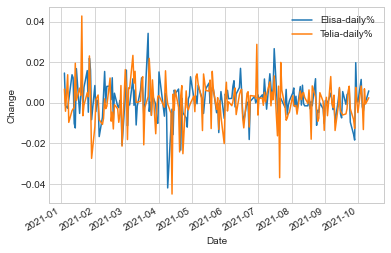

In [17]:
### View changes from the beginning of the year 2021

changes['2021':].plot()

### Vertical axis title
plt.ylabel('Change')

### Finish formatting the time axis

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [18]:
### Statistical numbers for percentages of changes

changes.describe()

,Elisa-daily%,Telia-daily%
count,1703.000000,1703.000000
mean,0.000618,-0.000135
std,0.014538,0.014054
min,-0.092226,-0.134499
25%,-0.006142,-0.006819
50%,0.000805,0.000000
75%,0.007662,0.007266
max,0.164016,0.109976


In [19]:
### Calculate the number of days the percentage of change has been greater than five per cent

changes[(abs(changes['Elisa-daily%']) > 0.05) | (abs(changes['Telia-daily%']) > 0.05)]

,Elisa-daily%,Telia-daily%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


## Is there a connection between wekdays and profit rate?

In [20]:
### Add weekdays to a column of their own (zero = Monday)

changes['Weekday'] = changes.index.weekday

### Elisa's statistical numbers by weekdays

changes.groupby('Weekday')['Elisa-daily%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,340.0,0.001566,0.012951,-0.055172,-0.004834,0.001106,0.008312,0.057805
1,345.0,0.001011,0.015469,-0.038976,-0.006827,0.000313,0.007416,0.164016
2,346.0,0.000976,0.013015,-0.053899,-0.005578,0.000371,0.008159,0.059656
3,340.0,-0.000013,0.015043,-0.084077,-0.006734,0.000570,0.007223,0.068757
4,332.0,-0.000488,0.015974,-0.092226,-0.005974,0.000997,0.007470,0.061796


In [21]:
### Telia's statistical numbers by weekdays

changes.groupby('Weekday')['Telia-daily%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,340.0,-0.000005,0.014134,-0.079728,-0.006654,-0.000473,0.007349,0.041424
1,345.0,0.000700,0.014266,-0.046268,-0.006353,0.000000,0.006910,0.109976
2,346.0,0.000149,0.012575,-0.061963,-0.006091,0.000000,0.007941,0.042816
3,340.0,-0.001224,0.015469,-0.134499,-0.007490,0.000000,0.006663,0.051014
4,332.0,-0.000316,0.013694,-0.066333,-0.007080,0.000000,0.007096,0.083107


## Correlation between percentages of changes

In [22]:
### Percentages of changes of Elisa and Telia have a positive correlation

changes.drop('Weekday', axis = 1).corr()

,Elisa-daily%,Telia-daily%
Elisa-daily%,1.000000,0.487393
Telia-daily%,0.487393,1.000000


<AxesSubplot:xlabel='Elisa-daily%', ylabel='Telia-daily%'>

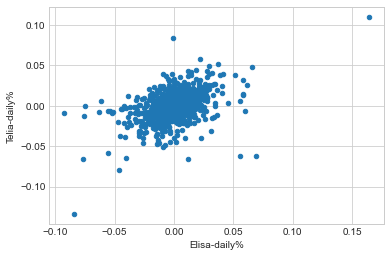

In [23]:
### Positive correlation between percentages of changes can be seen in the scatter chart

changes.plot.scatter(x = 'Elisa-daily%', y = 'Telia-daily%')

<AxesSubplot:xlabel='Date'>

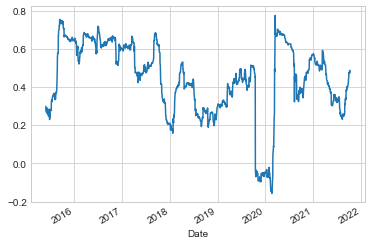

In [24]:
### Moving correlation describes how percentages of changes correlate at different times

changes['Elisa-daily%'].rolling(100).corr(changes['Telia-daily%']).plot()

## Moving volatility

Volatility describes the overall risk of a stock. It is announced as annual if the observation period is at least one year.

When calculating volatility standard deviation (std()) of percentage numbers of daily changes is determined and then it is transform to be annual when the deviation is multiplied by a square root of a factor that depends on the ratio of observation and destination data. In the following example this factor is assumed to be 252.

Moving volatility describes how volatility (i.e., risk) has changed over the time.

<AxesSubplot:xlabel='Date'>

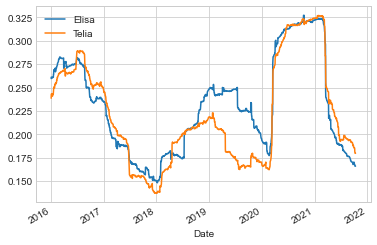

In [25]:
### Examples of moving volatility of 252 days

### Elisa stock
(changes['Elisa-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Elisa', legend = True)

### Telia stock
(changes['Telia-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Telia', legend = True)

## Line charts with two axis

Elisa and Telia stock prices are of different order. They can be drawn in one chart if two axes are used. 

(2.0, 6.0)

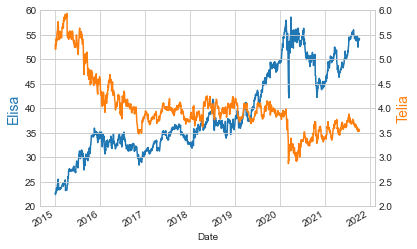

In [26]:
### Line chart of Elisa stocks closing prices.

axe = elisa['Close'].plot(color = 'C0')

### Add name for Elisa, colour and font size.

plt.ylabel('Elisa', color = 'C0', fontsize = 14)

### Scale the value axis of Elisa

plt.ylim(20, 60)

### Next we create another axes object (called axt) and determine it to have a common x-axis with the object axe.

axt = axe.twinx()

### Line chart of Telia stock closing prices

telia['Close'].plot(ax = axt, color ='C1')

### Add name for Telia, colour and font size.

plt.ylabel('Telia', color = 'C1', fontsize = 14)

### Scale the value axis of Telia

plt.ylim(2, 6)

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>